In [ ]:
# To Do:
'''
- create a model to predict yesterday's returns to today
- X = returns yesterday
- Y = returns today
- no sklearn
- divide train/test
- tell model to predict today's reutrns as exactly yesterday's
- shift function
'''

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns

In [139]:
# read data
returns = pd.read_pickle('Data/returns.pkl')
returns.head()

905270    921795    904261    905261    916328    923024  \
date                                                                     
1990-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
1990-01-03 -0.835165 -0.475059  5.000000 -0.810537  0.361421  0.000000   
1990-01-04 -0.797872 -1.272872  2.380952 -1.634321 -0.180060  3.454545   
1990-01-05 -2.546917  1.531023 -0.372093 -1.661475 -1.079730  1.054482   
1990-01-08  2.017423 -0.873016  0.000000  2.534319  0.000000  0.000000   

              936365    902355    912215    929813  ...  9660J1  69568X  \
date                                                ...                   
1990-01-02       NaN       NaN       NaN       NaN  ...     NaN     NaN   
1990-01-03 -3.030303  0.000000 -0.431034 -1.315789  ...     NaN     NaN   
1990-01-04 -1.562500  0.530612  0.225108  0.000000  ...     NaN     NaN   
1990-01-05 -3.174603  0.487211 -0.656531 -1.333333  ...     NaN     NaN   
1990-01-08  0.000000  1.010101  0.434783  3.405405  ...     NaN     NaN   

            543755  77463M  29235J  131745  69487D  68157P  9110RA  292703  
date                                                                        
1990-01-02     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-03     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-04     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-05     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1990-01-08     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1236 columns]

### Insert Model Here

In [140]:
daysToShift = 1

def modelShiftDays(days):
    new_df = returns.shift(days, axis=0)
    return new_df

# new dataframe after shift
df_pred = modelShiftDays(daysToShift)

### Plotting Data

<AxesSubplot:xlabel='date', ylabel='actual'>

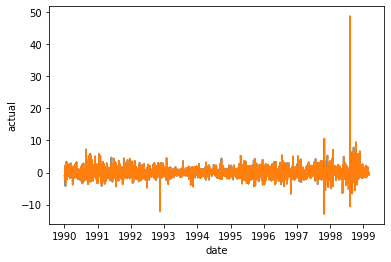

In [141]:
# For the first listed stock:

# create dataframe for all given days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]]
df['predicted'] = df_pred[returns.columns[0]]
df['date'] = returns.index
df.reset_index(drop=True, inplace = True)
df.head()

sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

Text(0.5, 1.0, 'Predicted vs Actual')

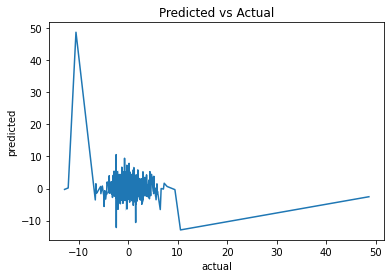

In [142]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

In [143]:
# For the first listed stock:

# create dataframe with all relevant data for first 30 days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]].iloc[:30]
df['predicted'] = df_pred[returns.columns[0]].iloc[:30]
df['date'] = returns.index[:30]
df.reset_index(drop=True, inplace = True)
df.head()

actual  predicted       date
0       NaN        NaN 1990-01-02
1 -0.835165        NaN 1990-01-03
2 -0.797872  -0.835165 1990-01-04
3 -2.546917  -0.797872 1990-01-05
4  2.017423  -2.546917 1990-01-08

<AxesSubplot:xlabel='date', ylabel='actual'>

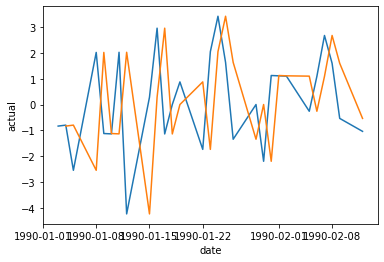

In [144]:
sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

Text(0.5, 1.0, 'Predicted vs Actual')

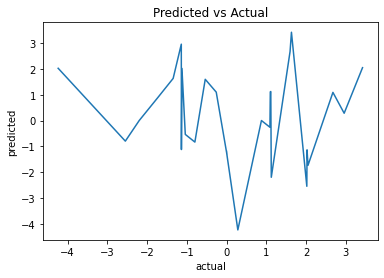

In [145]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

### Testing for Multiple Stocks

In [ ]:
#stock = df_pred.iloc[:, i]
#stock.head()

In [ ]:
daysToShift = 1
numStocks = 1

# new dataframe after shift
df_pred = modelShiftDays(daysToShift)

for i in range(numStocks):
    stock = df_pred.iloc[:, i]
    pred_list[name] = stock
    
    # create dataframe with all relevant data for first 30 days
    df = pd.DataFrame()
    df['actual'] = returns[returns.columns[0]].iloc[:30]
    df['predicted'] = df_pred[returns.columns[0]].iloc[:30]
    df['date'] = returns.index[:30]
    df.reset_index(drop=True, inplace = True)
    
    sns.lineplot(data=df, x='date', y='actual')
    sns.lineplot(data=df, x='date', y='predicted')

### Getting Top Returns